In [2]:
import pandas as pd
data = pd.read_csv('student_performance (1).csv')

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
X = data[['StudyHours']]
y = data['PastScore']
pipe = Pipeline([
    ('scaler' , 'passthrough') ,
    ('model' , None )
])
param_grid = [
    {
        'scaler' : [MinMaxScaler()] ,
        'model' : [KNeighborsRegressor()] ,
        'model__n_neighbors' :[3 , 5 , 7]
    },
    {
        'scaler' : [StandardScaler()] ,
        'model' : [LinearRegression()]
    }
]

grid = GridSearchCV(
    param_grid = param_grid ,
    estimator =  pipe ,
    cv = 5 ,
    scoring = 'neg_mean_squared_error' ,
    n_jobs = 2
)
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )
grid.fit(X_train , y_train)
print(grid.best_estimator_)
y_pred = grid.predict(X_test)
hour = float(input("Enter the number of hours you studied :"))
user_input = pd.DataFrame({'StudyHours' : [hour]})
user_pred = grid.predict(user_input)[0]

print(f"For the hours studied {hour} your mars will be {user_pred} /*based on historical data*/" \
    if user_pred <= 100 \
      else f"For the hours studied {hour} your marks will be 100 /*based on historical data*/")

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])


Enter the number of hours you studied : 1


For the hours studied 1.0 your mars will be 31.432216108054032 /*based on historical data*/


# Model Evaluation

In [24]:
from sklearn.metrics import r2_score , mean_squared_error 
from numpy import sqrt as st
r2 = r2_score(y_test , y_pred)
display("r2 score :" , r2)
mse = st(mean_squared_error(y_test , y_pred)).round(2)
display('mse :', mse)

'r2 score :'

0.986301127163045

'mse :'

np.float64(1.9)

# Model visualization

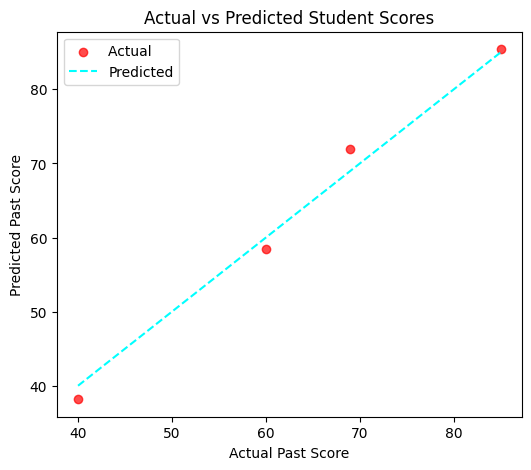

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7 , label = 'Actual ' , color = 'r')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--' , label = 'Predicted' , color = 'cyan'
)
plt.xlabel("Actual Past Score")
plt.ylabel("Predicted Past Score")
plt.title("Actual vs Predicted Student Scores")
plt.legend()
plt.show()
